In [22]:
import numpy as np
import pickle
from plotnine import *
import pandas as pd 


In [23]:

dict2 = {'0':'\u2080',
         '1':'\u2081',
         '2':'\u2082',
         '3':'\u2083',
         '4':'\u2084',
         '5':'\u2085',
         '6':'\u2086',
         '7':'\u2087',
         '8':'\u2088',
         '9':'\u2089',
         '+':'\u208A',
         '-':'\u208B',
         '=':'\u208C',
         '(':'\u208D',
         ')':'\u208E',
         'a':'\u2090',
         'e':'\u2091',
         'o':'\u2092',
         'x':'\u2093',
         'h':'\u2095',
         'k':'\u2096',
         'l':'\u2097',
         'm':'\u2098',
         'n':'\u2099',
         'p':'\u209A',
         's':'\u209B',
         't':'\u209C'}

def sups(base,x):
    z = '{}'.format(dict1.get(x))
    return base + z

def subs(base,x):
    z = '{}'.format(dict2.get(x))
    return base + z


In [39]:
print('\u03B1','\u03C9','\N{GREEK SMALL LETTER RHO}','\N{GREEK SMALL LETTER PSI}')

α ω ρ ψ


In [106]:
wantST=True
def getData(idcode,simDuration, condition,data,reps, idSim): #sobolPhlo4
    addToName = repr(reps)+"_"+repr(simDuration)+"_"+condition
    if data == "Siev" or data == "Siag":
        clonamesAll = ["maxTil","maxB", "a",
                     "lmax_r", "r_root", "ln_root", 
                     "lmax_stem", "r_stem", "ln_stem", #"ast",
                     "lmax_leaf", "r_leaf", "w_blade",        #+13 -6
                     'k_fw1','\N{GREEK SMALL LETTER PSI}_t,crit,1',              #'oi', 'Chl','fw1r',
                     'k_chl', 'k_g1','k_jmax', '\u03B1',         #'kchl1', 'kchl2',
                     '\u03C9', 'g_ox,max', 'k_x'] #, "l_kr",'kr_x'
        #clonamesAll = ['Chl','oi','fw1r','k_fw1','\u03C8_t,crit,1',
        #          'kchl1', 'kchl2',
        #         'kg1','kjmax', '\u03B1','\u03C9',
        #         '\u03B30', '\u03B31', '\u03B32','g_ox',
        #         'k_ax,x','k_lat,x']
        directory = './results/sobolParallel_xylem/'
        if data == "Siev":
            variablesName = "(A) Transpiration rate"
        if data == "Siag":
            variablesName = "(B) Assimilation rate"
    else:
        #clonamesAll = ['Q10','delta_osmo_min','psiMin','KMfu',
        #              'Vmaxloading','CSTimin','beta_loading', 
        #              'Mloading','Gr_Y','rhoSucrose',
        #         'kx_st','kr_st','Across','krm2','krm1','rmax',"k_S_", "leafGrowthZone", "l_kr"]
        clonamesAll = ["maxTil","maxB", "a",
                     "lmax_r", "r_root", "ln_root", 
                     "lmax_stem", "r_stem", "ln_stem", #"ast",
                     "lmax_leaf", "r_leaf", "width_blade", 
                        'Q10','\u0394\u03C8_o,symplast','\u03C8_p,crit,2',
                      'Mout','F_in,max',
                   '\u03B2_meso',  'Mmeso','Y',
                     '\u03C1s',
                     'k_st',
                      'Across',
                      'km', 
                      "k_starch"]
        directory = 'results/sobolParallel_phloem/'
        variablesName = "(C) G_tot,CWlim"
    directory = directory + repr(simDuration) + condition + idSim+"/"
    with open(directory + data+'_R'+addToName+'.pkl','rb') as f:
        allS = pickle.load(f)
        if wantST:
            Siev = allS['ST']
            Sievconf = allS['ST_conf']
        else:
            Siev = allS['S1']
            Sievconf = allS['S1_conf']
    df = pd.DataFrame(np.array([Siev]), columns =clonamesAll)
    df_conf = pd.DataFrame(np.array([Sievconf]), columns =clonamesAll)
    dfmean = pd.DataFrame(data=df.mean(),columns=["mean"])
    dfmean["maxst"] = (df + df_conf).max()
    dfmean["minst"] = (df - df_conf).min()
    dfmean['variables']=dfmean.index
    dfmeanEv21w = dfmean
    if condition == "wet":
        dfmeanEv21w['condition'] = "baseline"
    else:
        dfmeanEv21w['condition'] = "dry spell"
    if simDuration == 18:
        dfmeanEv21w['simDuration'] = idcode + "18d"
    else:
        dfmeanEv21w['simDuration'] = idcode+ "11d"
    dfmeanEv21w["variable"] = variablesName
    return dfmeanEv21w
    


In [107]:
def getAll4var(variable, id1, id2, reps, idSimYw, idSimYd, idSimOw, idSimOd):
    print(id1 ,8 , "wet",variable,reps[0])
    df1 = getData(id1 ,11 , "wet",variable,reps[0],idSimYw)
    print(id1 ,8 , "dry",variable,reps[1])
    df2 = getData(id1 ,11 , "dry",variable,reps[1],idSimYd)
    print(id2 ,21, "wet",variable,reps[2])
    try:
        df3 = getData(id2 ,18, "wet",variable,reps[2],idSimOw)
    except:
        print("failure for df3")
        df3 = df2#np.full(len(df2), np.nan)
    print(id2 ,21, "dry",variable,reps[3])
    try:
        df4 = getData(id2 ,18, "dry",variable,reps[3],idSimOd)
    except:
        print("failure for df4")
        df4 = df2#np.full(len(df2), np.nan)
    dftt = pd.concat([df1, df2,df3,df4])
    return dftt

In [108]:

dftgr = getAll4var("Sigr","","",[11,11,11,11],"11134","11133","11139","11138")
dftev = getAll4var("Siev","","",[12,12,12,12],"11118","11116","11115","11117")
dftag = getAll4var("Siag","","",[12,12,12,12],"11118","11116","11115","11117")

 8 wet Sigr 11
 8 dry Sigr 11
 21 wet Sigr 11
 21 dry Sigr 11
 8 wet Siev 12
 8 dry Siev 12
 21 wet Siev 12
 21 dry Siev 12
 8 wet Siag 12
 8 dry Siag 12
 21 wet Siag 12
 21 dry Siag 12


/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 24 rows containing missing values.


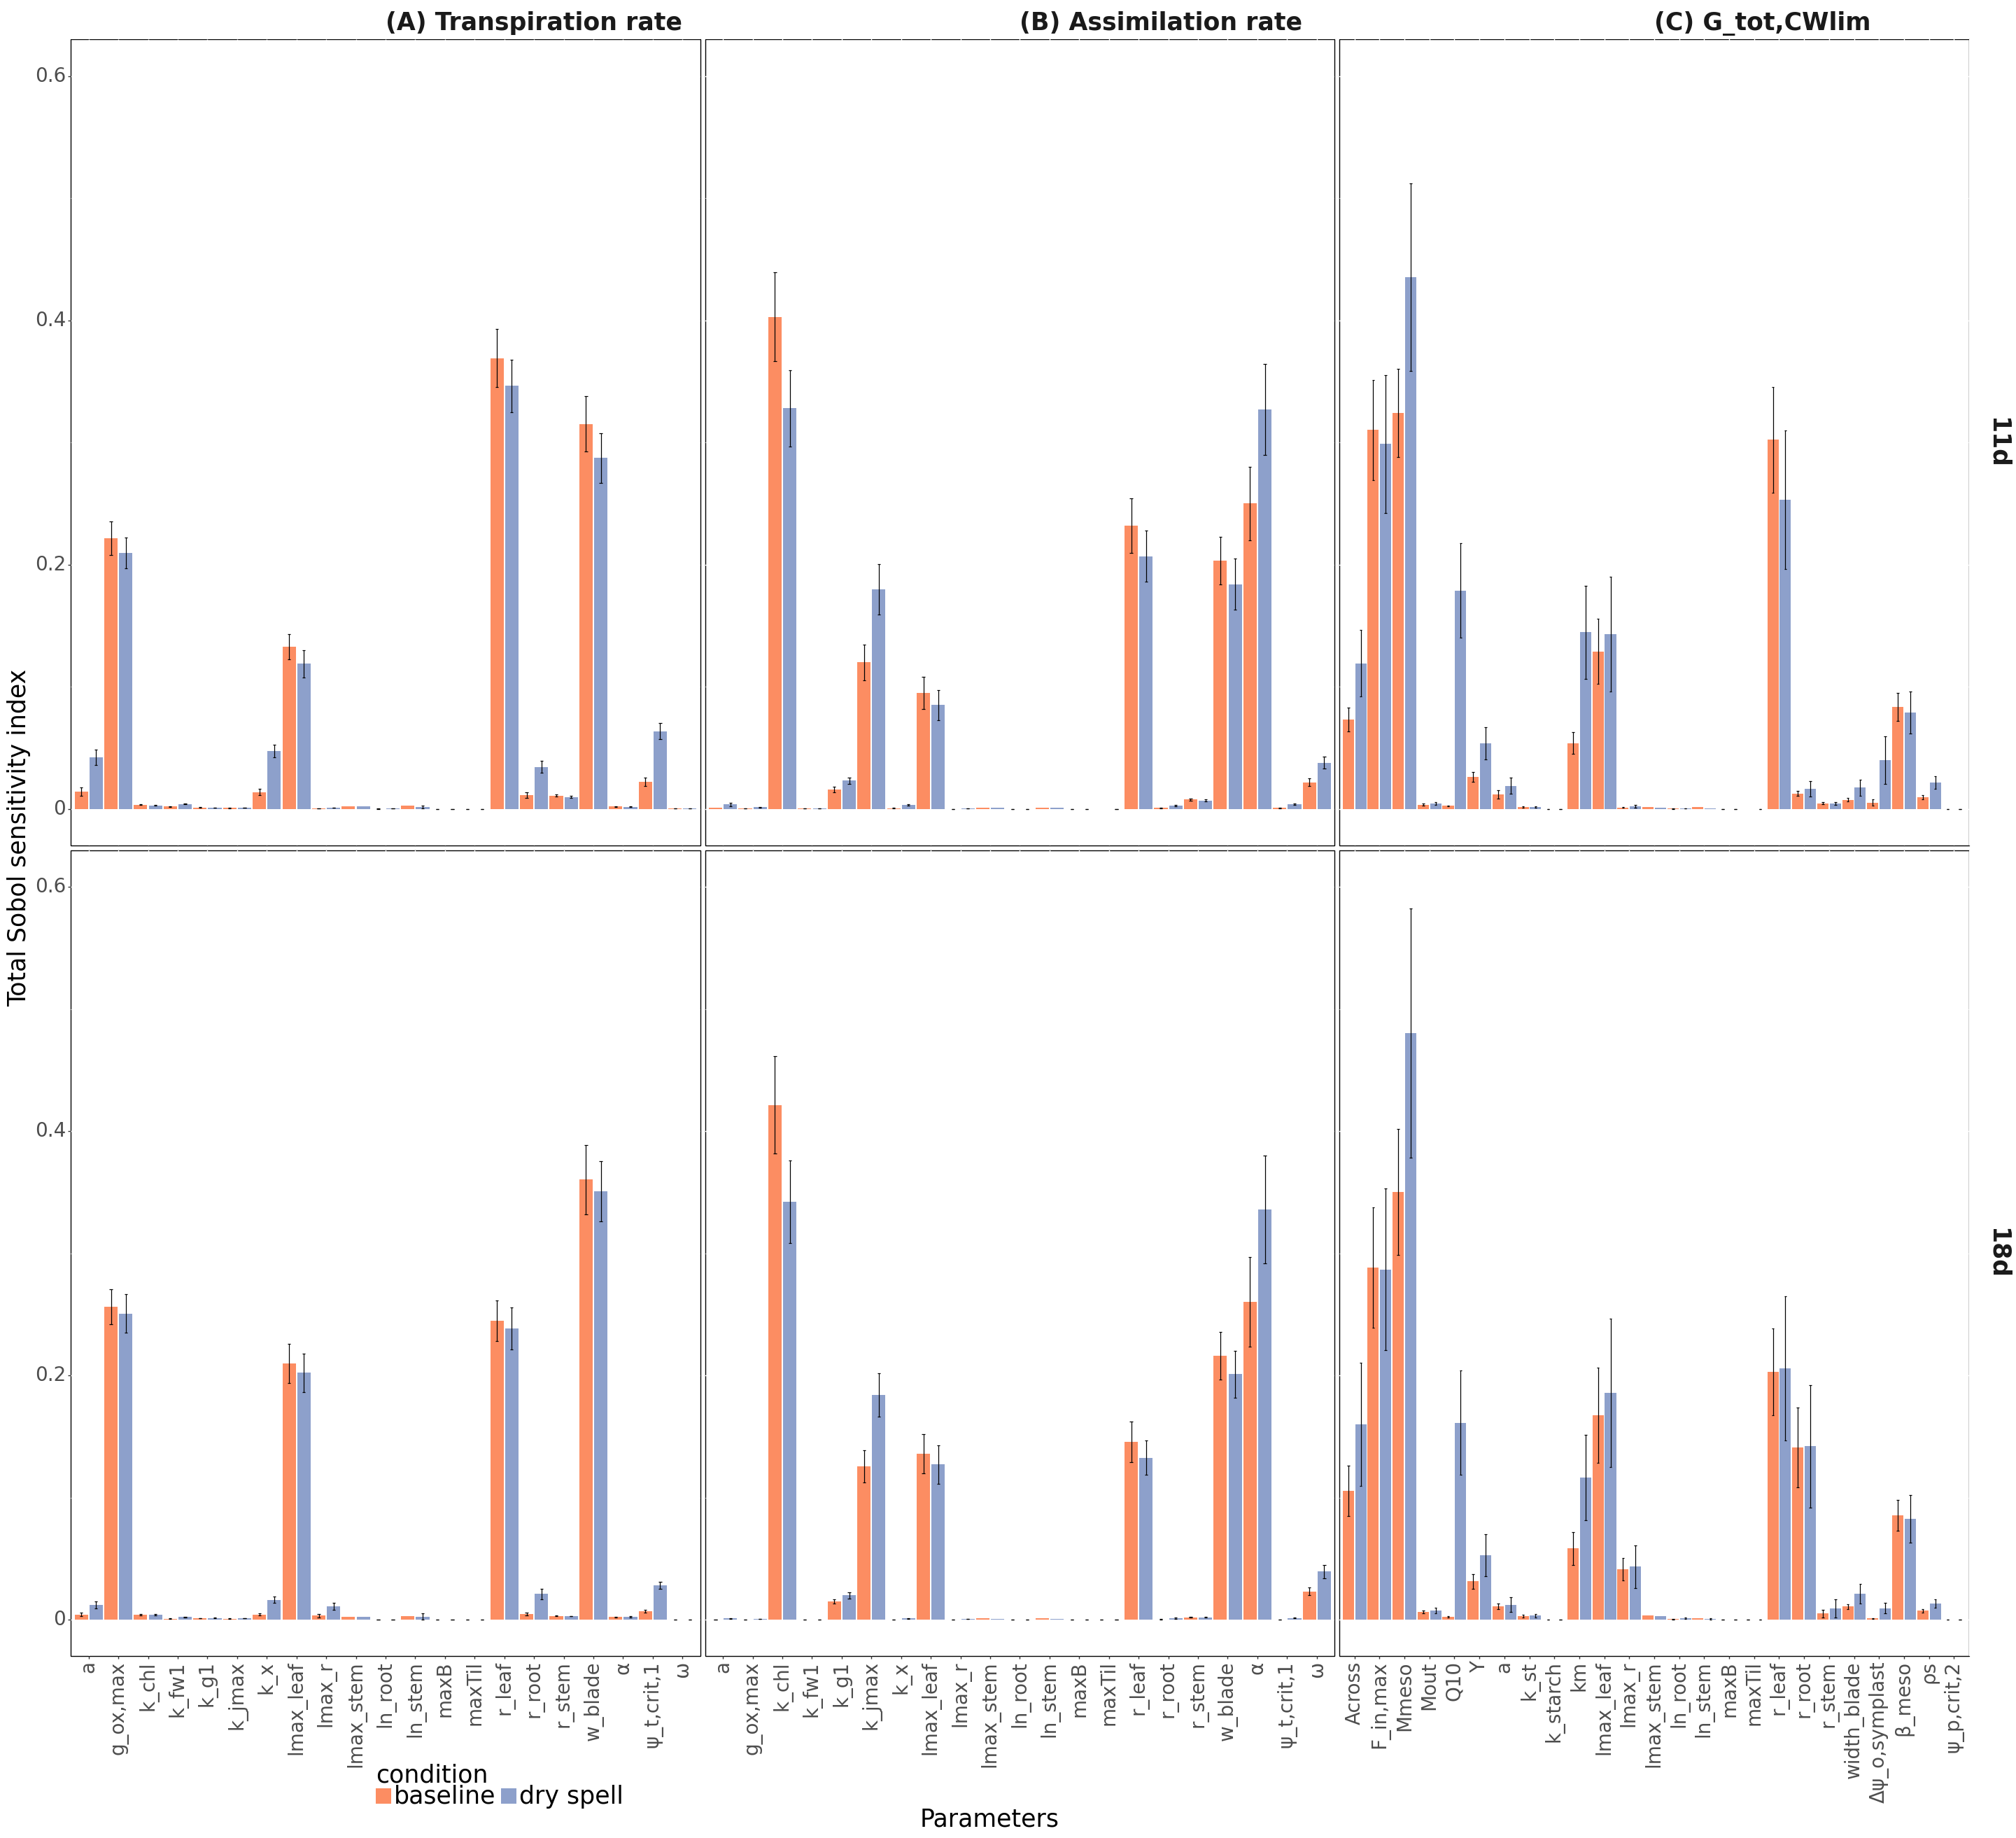

In [113]:
df3 = pd.concat([dftev, dftag,dftgr])

df3['simDuration'] = df3['simDuration'].astype('category')
df3['simDuration'] = df3['simDuration'].cat.reorder_categories(['11d', '18d'])
df3['variables'] = pd.Categorical(df3['variables'].tolist(),    ordered=True)
from plotnine import options
options.figure_size = (35, 30)
fig, plot =(
    ggplot(df3)  # What data to use
    + aes(x='variables', y= "mean",  fill="condition" )  # What variable to use
    + geom_bar(stat = "identity",position=position_dodge(width=1))  # Geometric object to use for drawing
    + xlab("Parameters")
    + ylim(0,0.6)
    + facet_grid("simDuration~variable", scales = "free", space = "free")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"),position=position_dodge(width=1),width=.2) 
    + ylab("Total Sobol sensitivity index")
    + scale_fill_manual(name="",
                     values = ["#FC8D62","#8DA0CB"])
    #+scale_x_discrete(limits=df3['variables'].tolist())
     #+ geom_hline(aes(yintercept=0.25))
    +theme(legend_text = element_text( size=25),
        legend_title = element_text( size=25),
        panel_border = element_rect(color = "black", fill = "white", size = 1), 
        legend_position= [0.3,0.05],
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill= "white", color="black"),
        strip_text_y =element_text( size=25) ,
        axis_text_x =element_text(angle = 90, size=20) ,
        axis_text = element_text( size=20),
        axis_title = element_text( size=25),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 25, hjust = 0,face ="bold")) 
).draw(show=True, return_ggplot=True)
fig.savefig('sobol_isP.png', dpi=600)


In [89]:
print('\N{GREEK SMALL LETTER PI}r\N{SUPERSCRIPT TWO}')
print('k\u2090')
print('r\N{SUBSCRIPT THREE}')

πr²
kₐ
r₃


In [93]:
df4 = df3[df3['simDuration']=="18d"]#) 
df4 = df4[df4['variable']=="C) G_tot,CWlim"]



/home/m.giraud/.conda/envs/py38b/lib/python3.8/site-packages/plotnine/layer.py:411: PlotnineWarning: geom_errorbar : Removed 3 rows containing missing values.


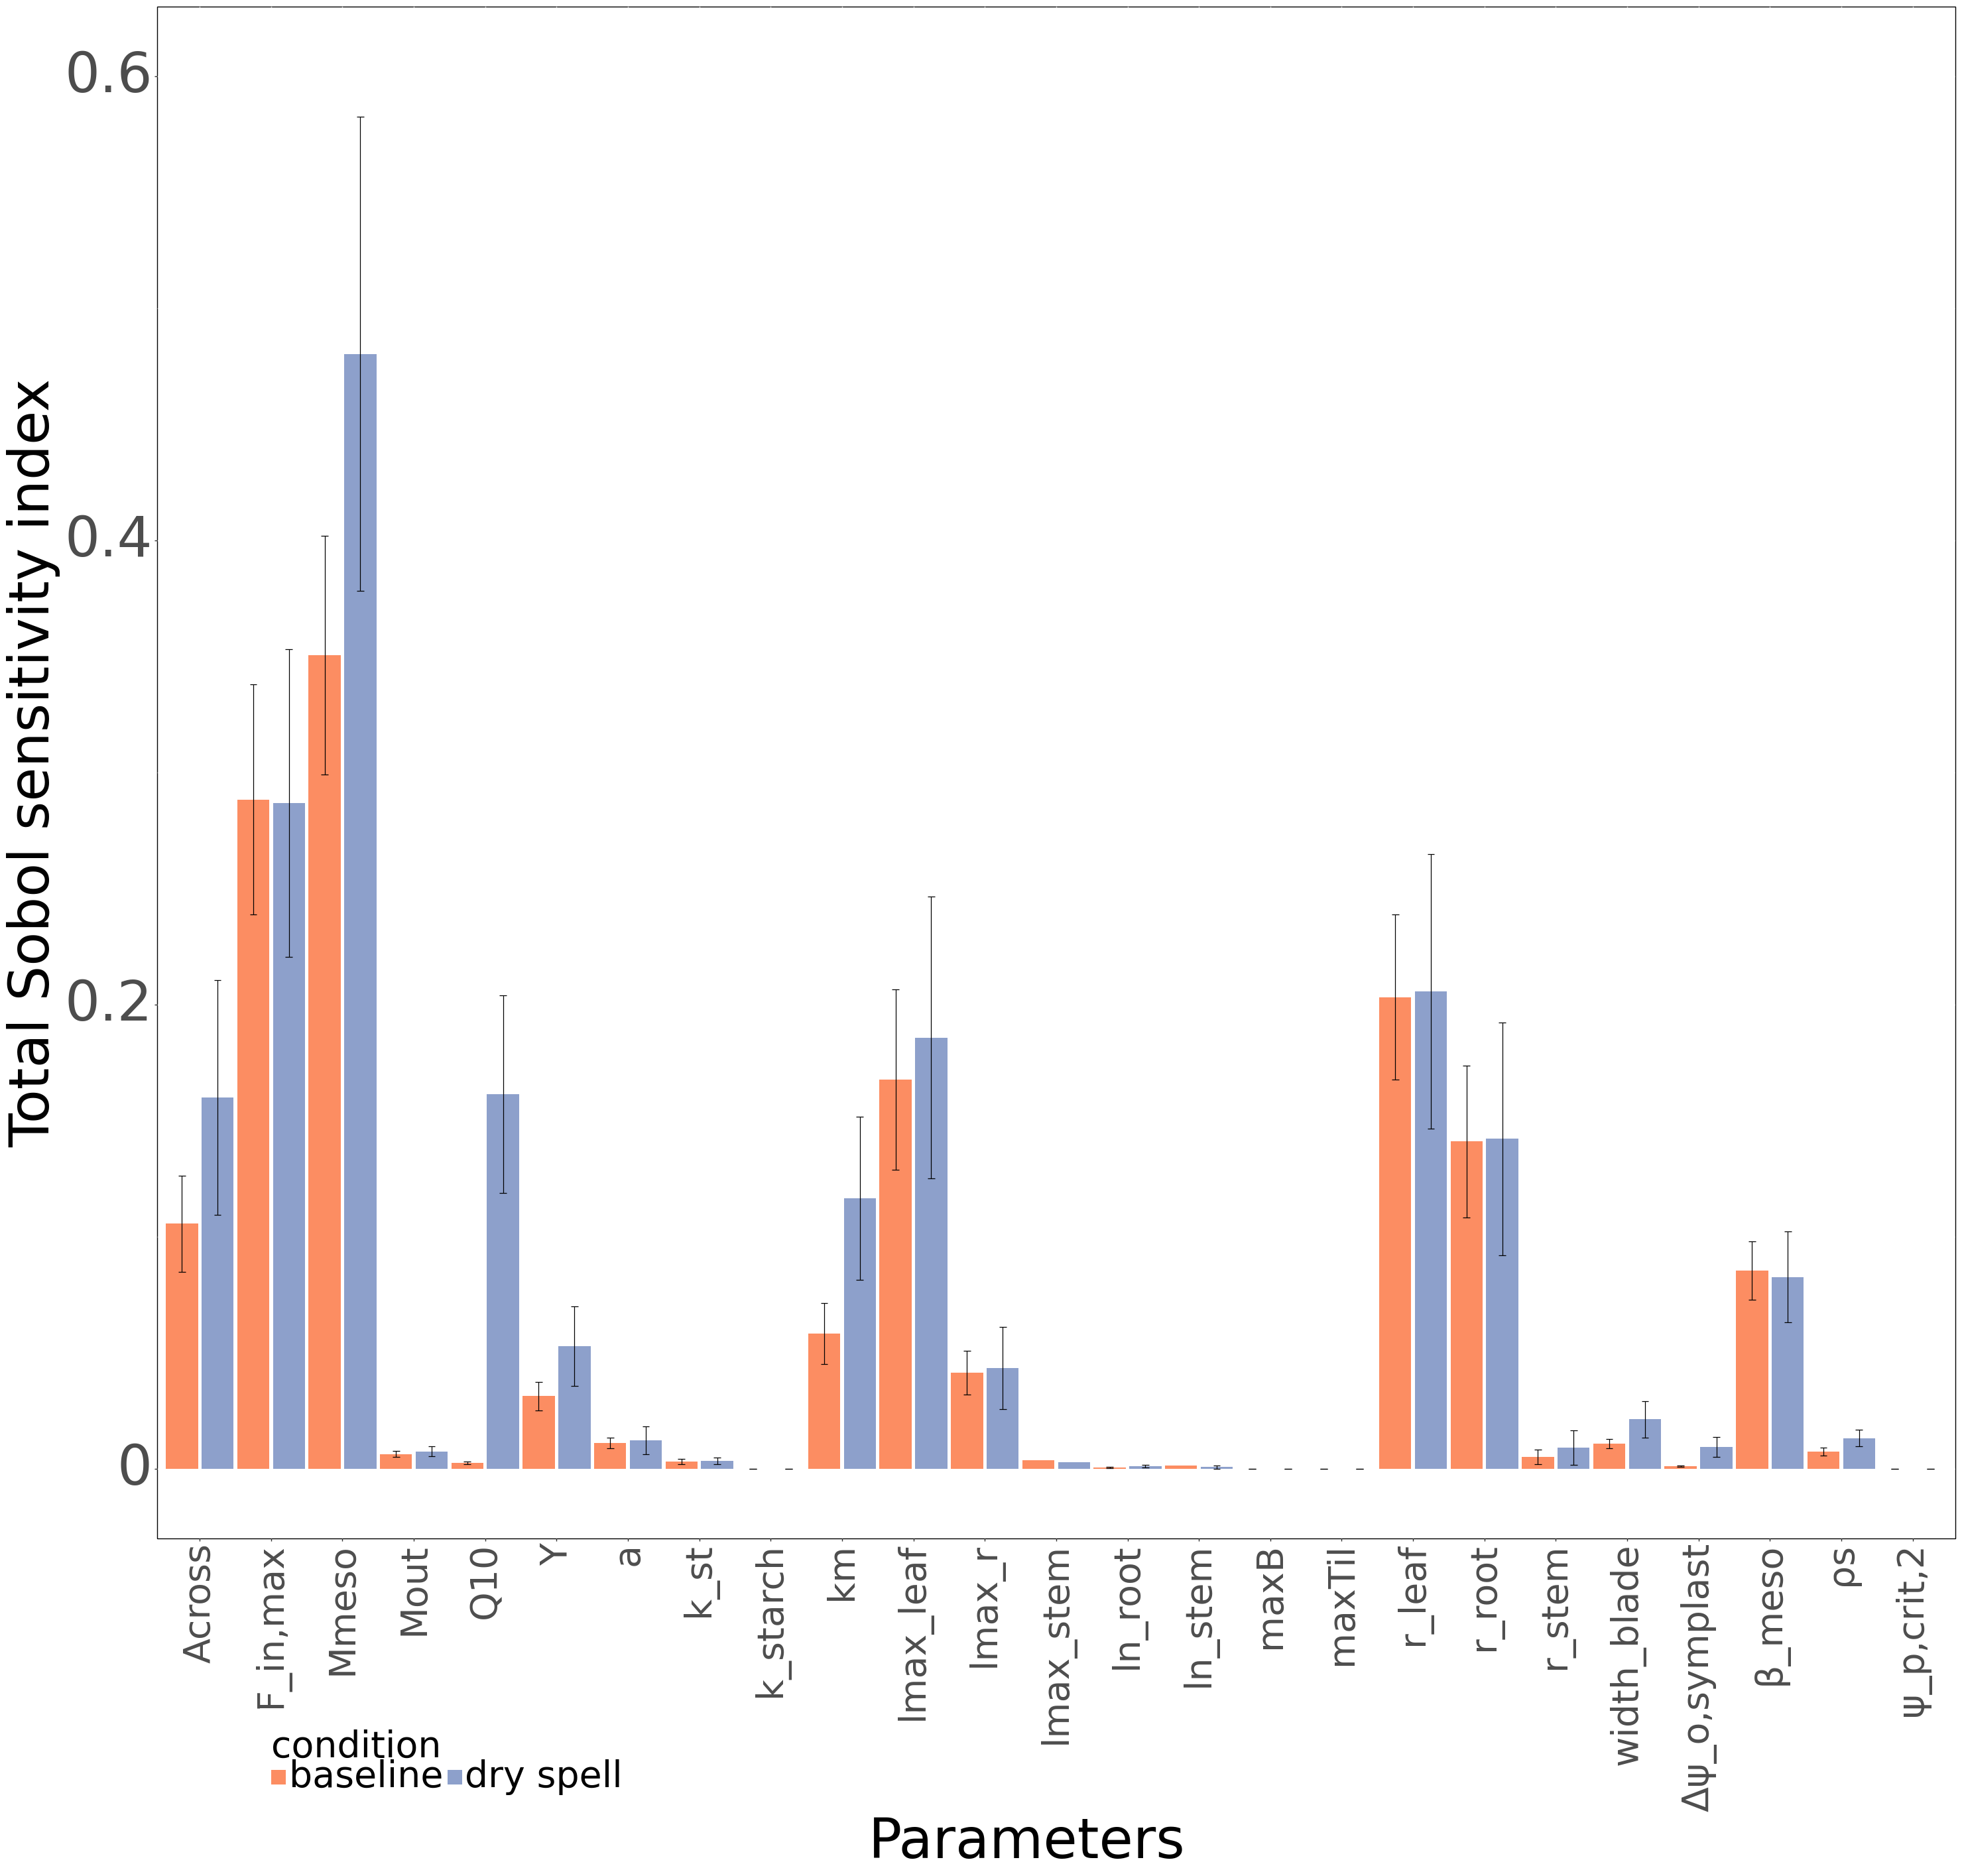

In [102]:
options.figure_size = (35, 30)
fig, plot =(
    ggplot(df4)  # What data to use
    + aes(x='variables', y= "mean",  fill="condition" )  # What variable to use
    + geom_bar(stat = "identity",position=position_dodge(width=1))  # Geometric object to use for drawing
    + xlab("Parameters")
    + ylim(0,0.6)
    #+ facet_grid("simDuration~variable", scales = "free", space = "free")
    + geom_errorbar(aes(ymin="minst", ymax="maxst"),position=position_dodge(width=1),width=.2) 
    + ylab("Total Sobol sensitivity index")
    + scale_fill_manual(name="",
                     values = ["#FC8D62","#8DA0CB"])
    #+scale_x_discrete(limits=df3['variables'].tolist())
     #+ geom_hline(aes(yintercept=0.25))
    +theme(legend_text = element_text( size=40),
        legend_title = element_text( size=40),
        panel_border = element_rect(color = "black", fill = "white", size = 1), 
        legend_position= [0.25,0],
        #legend.direction = "horizontal",
        legend_box = "vertical",
        panel_grid_minor = element_line(colour="white"),
        panel_grid_major = element_line(colour="white"),
        panel_background = element_rect(fill= "white", color="black"),
        strip_text_y =element_text( size=60) ,
        axis_text_x =element_text(angle = 90, size=40) ,
        axis_text_y =element_text(size=60) ,
        axis_text = element_text( size=30),
        axis_title = element_text( size=60),
        strip_background = element_rect(fill="white"),
        strip_text = element_text(size = 60, hjust = 0,face ="bold")) 
).draw(show=True, return_ggplot=True)
fig.savefig('sobol_aspb.png', dpi=300)